# CALORIES

### Import Packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./dataGit/DataSet/calories_dataset.csv')
data.head(20)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35
5,female,36,151,50,23,96,40.7,123
6,female,33,158,56,22,95,40.5,112
7,male,41,175,85,25,100,40.7,143
8,male,60,186,94,21,97,40.4,134
9,female,26,146,51,16,90,40.2,72


In [3]:
def add_Gender(inpt):
    if inpt == 'male':
        return '1'
    if inpt  == 'female':
        return '0'
    
data['Gender'] = data['Gender'].apply(add_Gender)

### Display Number of Rows, Columns

In [4]:
data.shape

(15000, 8)

### Number of Missing Values in the Dataset

In [5]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Drop Columns

In [6]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35


In [7]:
data = data.fillna(0)

In [8]:
data['Gender']=data['Gender'].astype(np.int64)

In [9]:
data['Body_Temp']=data['Body_Temp'].astype(np.int64)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Gender      15000 non-null  int64
 1   Age         15000 non-null  int64
 2   Height      15000 non-null  int64
 3   Weight      15000 non-null  int64
 4   Duration    15000 non-null  int64
 5   Heart_Rate  15000 non-null  int64
 6   Body_Temp   15000 non-null  int64
 7   Calories    15000 non-null  int64
dtypes: int64(8)
memory usage: 937.6 KB


### Find the Feature Importance

<AxesSubplot:>

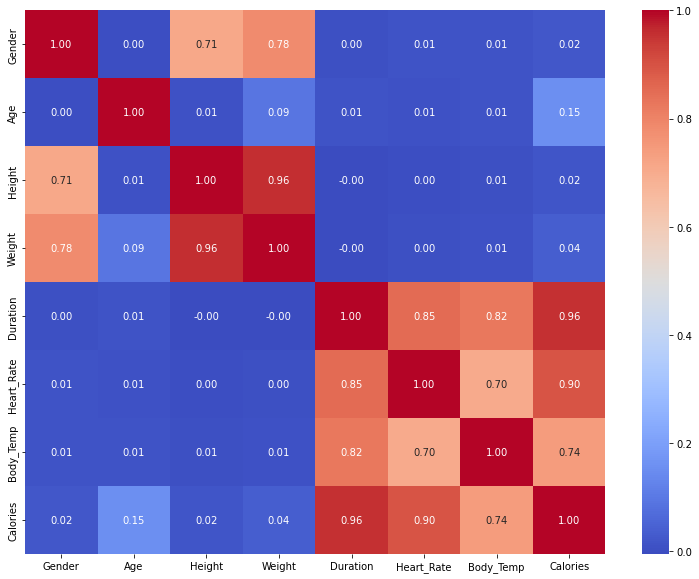

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### Split the Dataset

In [12]:
X = data.drop('Calories',axis=1)
Y = data['Calories']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)

In [14]:
X_train.shape

(12000, 7)

In [15]:
X_test.shape

(3000, 7)

### Create Function for Output Training and Testing Accuracy without using Cross Validation

### Create Function for Output Training and Testing Accuracy using Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
def model_acc_cross_val(model):
    model.fit(X_train.values,Y_train.values)
    acc1 = cross_val_score(model,X_train,Y_train, cv=5).mean()
    acc2 = cross_val_score(model,X_test.values,Y_test, cv=5).mean()
    print(str(model)+' Training Accuracy --> '+str(acc1))
    print(str(model)+' Testing Accuracy --> '+str(acc2))

### Get Training and Testing Accuracy

In [16]:
def model_acc(model):
    model.fit(X_train.values,Y_train.values)
    acc1 = model.score(X_train.values,Y_train)
    acc2 = model.score(X_test.values,Y_test.values)
    print(str(model)+' Training Accuracy --> '+str(acc1))
    print(str(model)+' Testing Accuracy --> '+str(acc2))

In [53]:
from sklearn.naive_bayes import MultinomialNB
MNBC = MultinomialNB()
model_acc(MNBC)

MultinomialNB() Training Accuracy --> 0.04516666666666667
MultinomialNB() Testing Accuracy --> 0.03133333333333333


In [54]:
from sklearn.naive_bayes import GaussianNB
GNBC = GaussianNB()
model_acc(GNBC)

GaussianNB() Training Accuracy --> 0.06183333333333333
GaussianNB() Testing Accuracy --> 0.04766666666666667


In [55]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
model_acc(SGDC)

SGDClassifier() Training Accuracy --> 0.009916666666666667
SGDClassifier() Testing Accuracy --> 0.007666666666666666


In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
model_acc(KNC)

KNeighborsClassifier() Training Accuracy --> 0.21175
KNeighborsClassifier() Testing Accuracy --> 0.03133333333333333


In [19]:
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor()
model_acc(RFC)

RandomForestRegressor() Training Accuracy --> 0.9997209756709133
RandomForestRegressor() Testing Accuracy --> 0.9979752392149578


In [58]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
model_acc(DT)

DecisionTreeClassifier() Training Accuracy --> 1.0
DecisionTreeClassifier() Testing Accuracy --> 0.164


### Testing Accuracy After Hyperparameter tuning

In [82]:
RFC.score(X_test,Y_test)

0.9982411036612453

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [2,4,5,6,8],
    'weights' : ['uniform','distance'],
    'leaf_size': [10,20,30,40]
}
grid_search = GridSearchCV(estimator=KNCmodel,param_grid=param_grid)

In [ ]:
grid_search = GridSearchCV(estimator=KNCmodel,param_grid=param_grid)

In [ ]:
grid_search.fit(X_train,Y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_test,Y_test)

In [20]:
RFC.predict([[1,68,190,94,29,105,40]])

array([230.44])

### Save the Model with pickle

In [92]:
import pickle
with open('Calories.pickle', 'wb') as file:
    pickle.dump(RFC, file)

### Make a Simple Prediction using the Model

In [93]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40,231
1,0,20,166,60,14,94,40,66
2,1,69,179,79,5,88,38,26
3,0,34,179,71,13,100,40,71
4,0,27,154,58,10,81,39,35


In [94]:
loaded_model = pickle.load(open('Calories.pickle', 'rb'))

In [95]:
predicted_value=loaded_model.predict([[1,68,190,94,29,105,40]])



predicted_value

array([230.34])